In [ ]:
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/DecisionTree

/content/drive/MyDrive/Course Material/Supervised Machine Learning/DecisionTree


# Importing Data

In [ ]:
train = pd.read_csv('titanic_train.csv')
train.shape

(891, 12)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Embarked implies where the traveler mounted from. There are three possible values for Embark
### Southampton, Cherbourg, and Queenstown.

### SibSp is the number of siblings or spouse of a person onboard

###  Parch is the feature contained the number of parents or children each passenger was touring with.

# Droping Irrelevant Features

In [ ]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True) # Removing coz of no importance
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Checking For Null Values

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Replacing Null Values in "Age" with mean value of "Age"

In [ ]:
train.fillna(value = { "Age" : train['Age'].mean()}, inplace = True)

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Drop all the rows containing Null Values

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Creating Dummy Variables and dropping first column to avoid multicollinearity

In [ ]:
Sex = pd.get_dummies(train['Sex'],drop_first = True)
Embark = pd.get_dummies(train['Embarked'],drop_first = True)

# Adding dummy variables to original data

In [ ]:
train = pd.concat([train, Sex, Embark], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


# Removing Sex and Embarked because their dummy variables are created

In [ ]:
train.drop(['Sex', 'Embarked'], axis=1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Extracting features and labels

In [ ]:
X = train.drop(['Survived'], axis = 1)

In [ ]:
y = train['Survived']

# Performing a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Applying Tree Classifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

# Getting Predictions from X_test

In [ ]:
y_pred= dtree.predict(X_test)

# Calculating Accuracy

In [ ]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 75.28


# Generating Confusion Matrix

In [ ]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

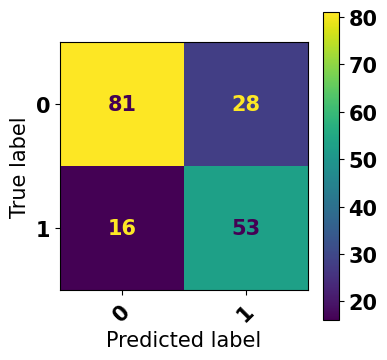

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(4)
fig.set_figheight(4)
plt.show()

## Plotting Decision Tree

In [ ]:
plt.figure(figsize=(60,40),dpi=150)
plot_tree(dtree, filled = True, feature_names = X.columns);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pd.DataFrame(index = X.columns, data=dtree.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Pclass,0.091840
Age,0.260249
SibSp,0.045619
Parch,0.041657
Fare,0.224429
male,0.294378
Q,0.013430
S,0.028399


# Applying Pruning By Setting Parameters Using GridSearch Method

We will control these parameters

max_depth: maximum depth of decision tree

min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to

In [ ]:
k = 5
cv = KFold(n_splits=k, shuffle = True)
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12],
         'min_samples_leaf': [1,2,3,4,5],
         'criterion': ['gini', 'entropy']}

DTGS = DecisionTreeClassifier()
gcv = GridSearchCV(DTGS, param_grid=params, cv = cv)
gcv.fit(X_train,y_train)
gcv.best_params_

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 5}

In [ ]:
model = gcv.best_estimator_

In [ ]:
y_pred_cv = model.predict(X_test)

In [ ]:
Accuracy = np.mean(y_pred_cv == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 78.09


In [ ]:
plt.figure(figsize=(60,40),dpi=150)
plot_tree(model, filled = True, feature_names = X.columns);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pd.DataFrame(index = X.columns, data=model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Pclass,0.122215
Age,0.182691
SibSp,0.022753
Parch,0.012445
Fare,0.206323
male,0.430007
Q,0.002994
S,0.020573
